### *iris*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/user/Downloads/iris/bezdekIris.csv", header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class']

In [3]:
df.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class'], dtype='object')

In [4]:
df.isna().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
class           0
dtype: int64

In [5]:
df.drop('class', axis=1, inplace=True)

In [6]:
df

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### *KMeans*

In [7]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
kmeans.score(df)

cluster[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
중심점: [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]
응집도: 152.34795176035792


-152.34795176035792

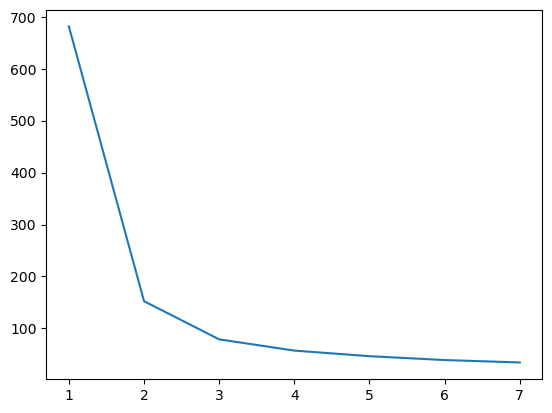

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

iris = df
temp=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(iris)
  temp.append(kmeans.inertia_)
plt.plot(range(1,8),temp)

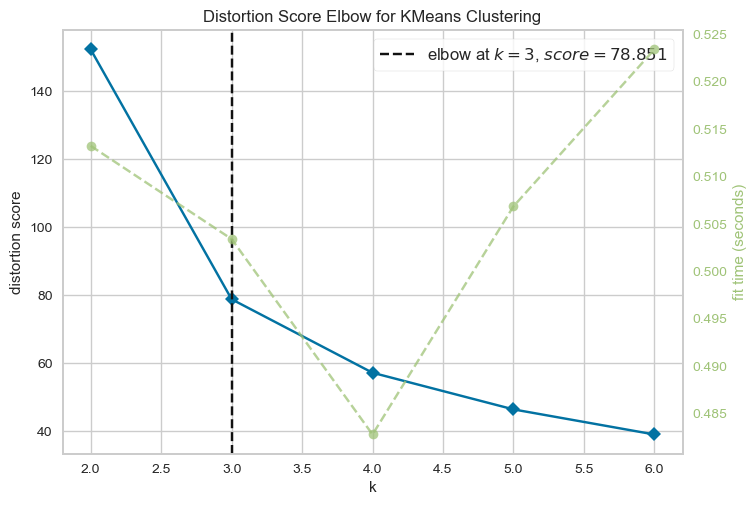

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
iris = df

visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(iris) 
visualizer.show() 

### *Hierarchical Clustering*

Text(0, 0.5, 'distance')

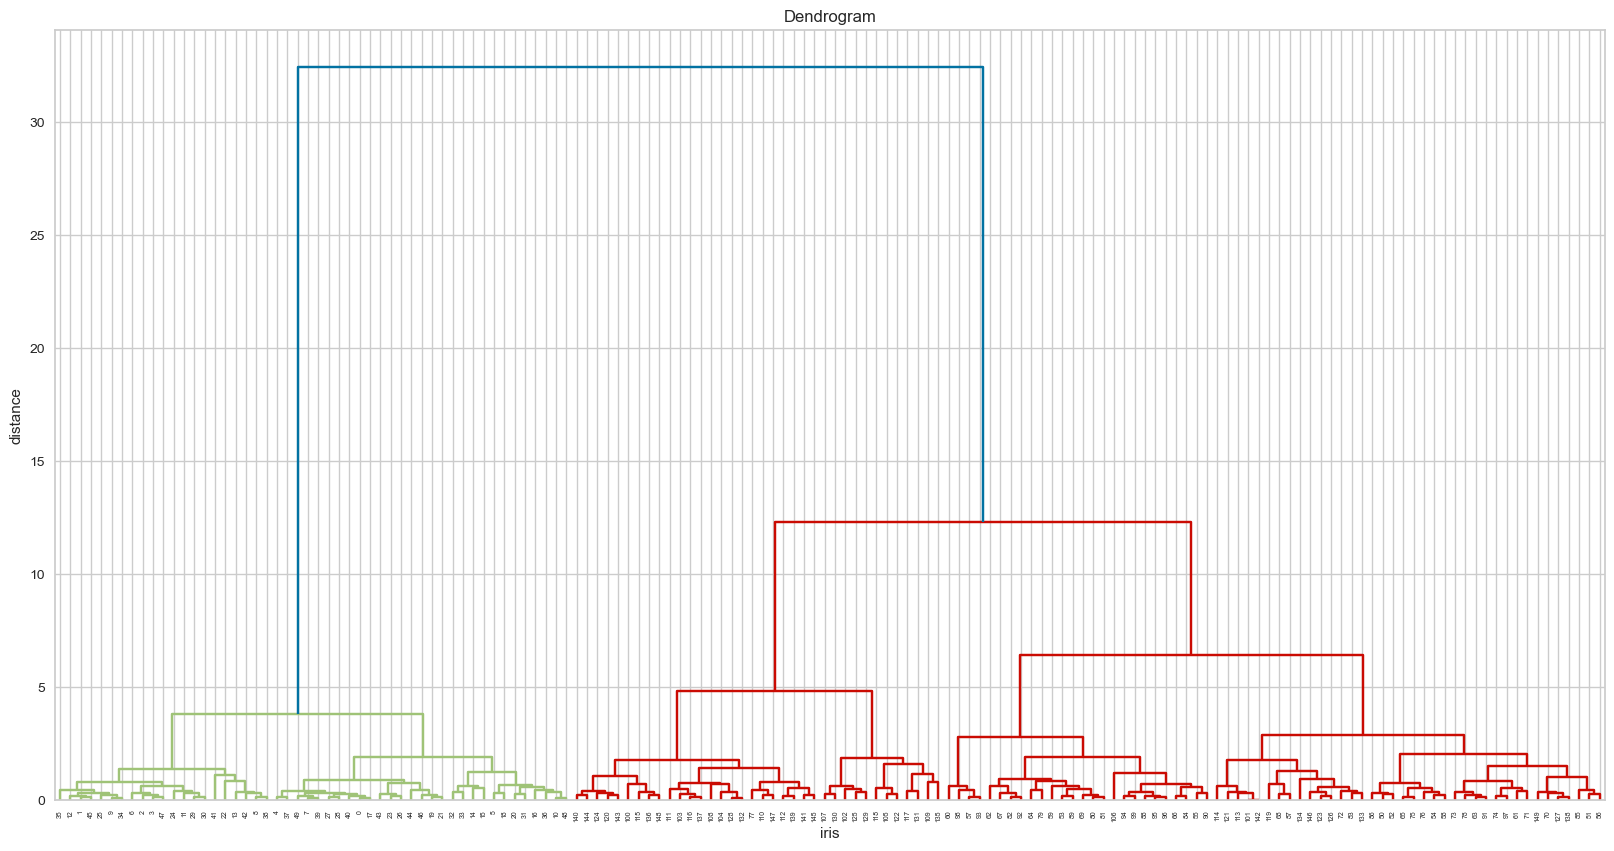

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
iris = df
plt.figure(figsize=(20,10))
cluster=linkage(iris, method='ward')

dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')

In [11]:
from sklearn.cluster import AgglomerativeClustering # cluster 개수 설정
iris = df
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # ward는 새 cluster 분산 최소화.
cluster.fit_predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Kaggle *Mall Customer*

In [12]:
df = pd.read_csv('C:/Users/user/Downloads/Kaggle_Mall Customer/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Distplot of Age')

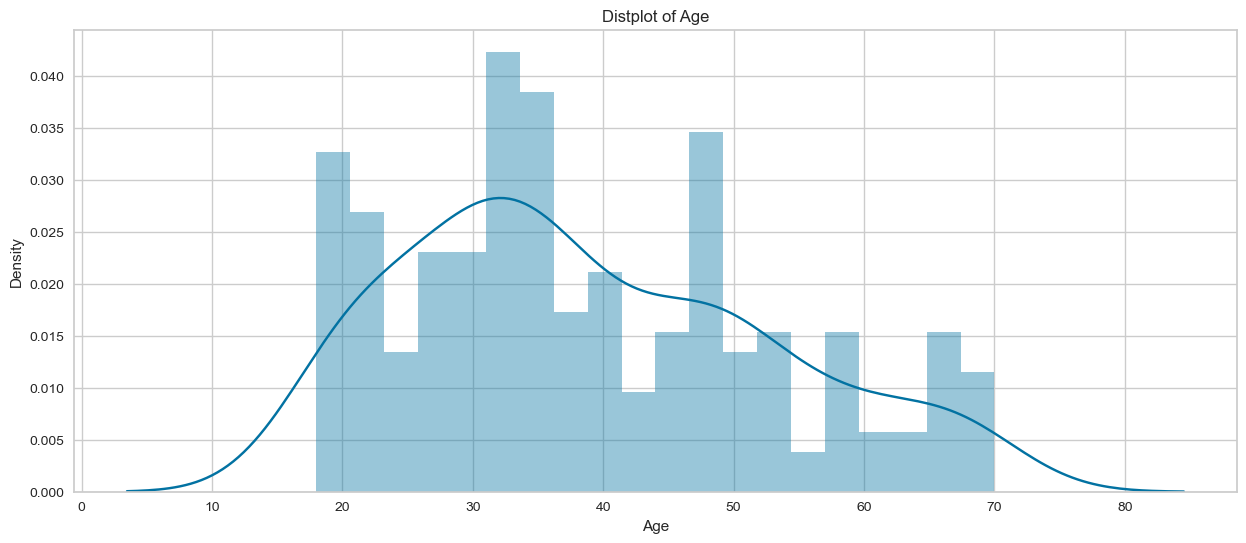

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
sns.distplot(df['Age'] , bins = 20)
plt.title('Distplot of Age')

Text(0.5, 1.0, 'Distplot of Annual Income (k$)')

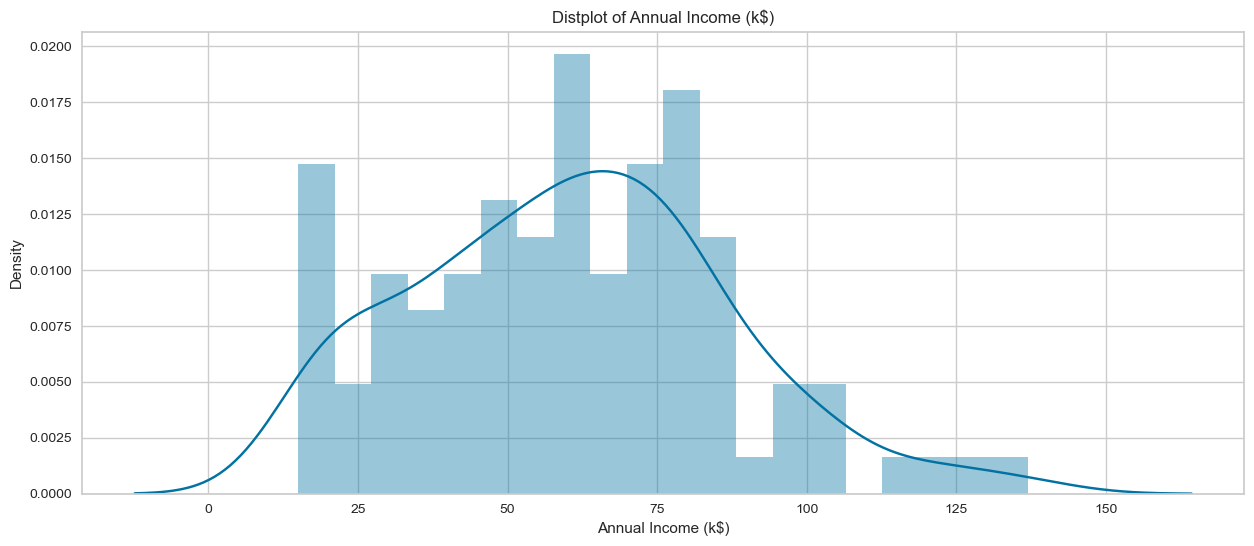

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
sns.distplot(df['Annual Income (k$)'] , bins = 20)
plt.title('Distplot of Annual Income (k$)')

Text(0.5, 1.0, 'Distplot of Spending Score')

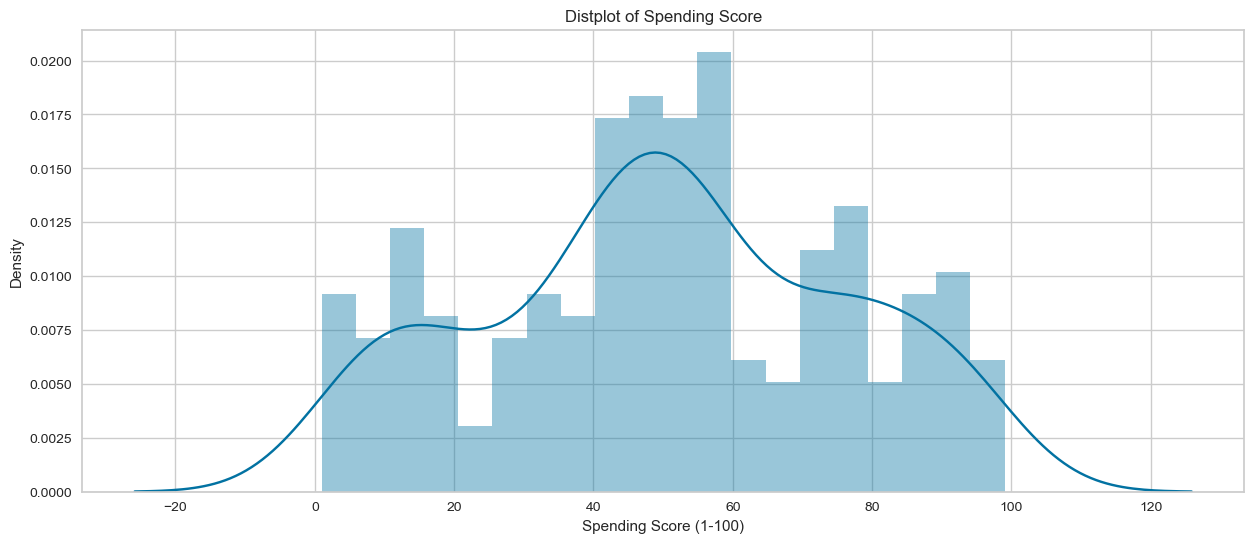

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
sns.distplot(df['Spending Score (1-100)'] , bins = 20)
plt.title('Distplot of Spending Score')

<Axes: xlabel='count', ylabel='Gender'>

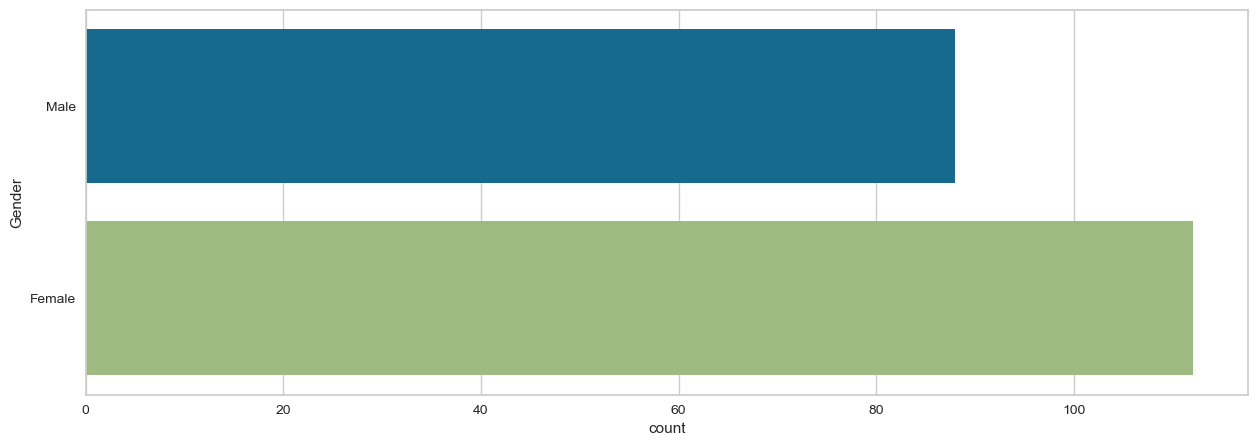

In [18]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)

In [19]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

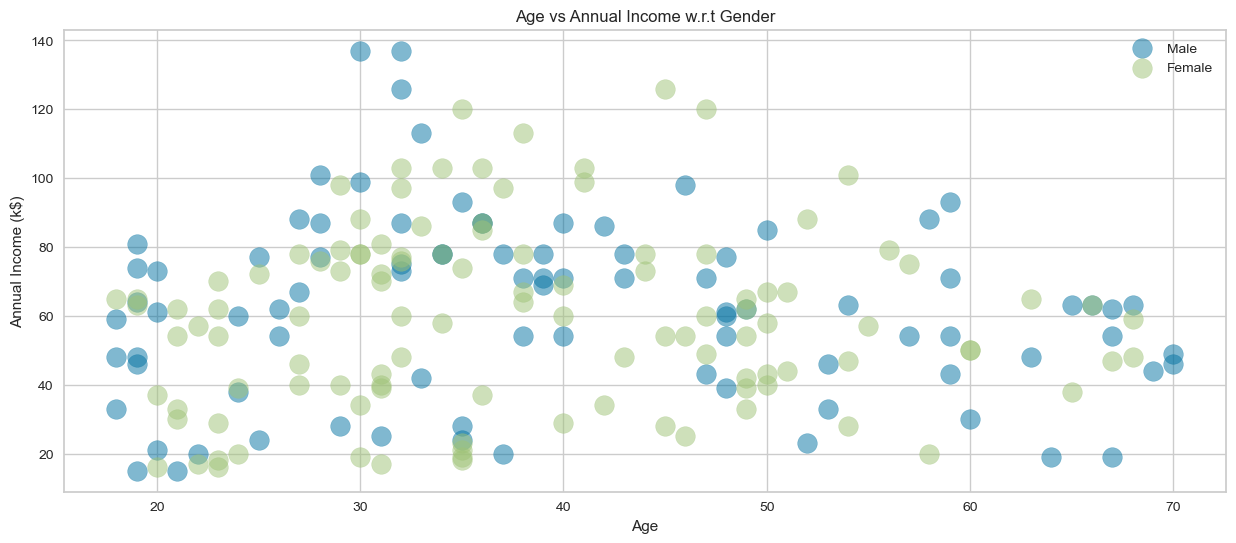

In [20]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

In [21]:
df.groupby('Gender')[['Age','Annual Income (k$)']].agg(['mean'])

,Age,Annual Income (k$)
,mean,mean
Gender,,
Female,38.098214,59.250000
Male,39.806818,62.227273


Text(25.972222222222214, 0.5, 'Gender')

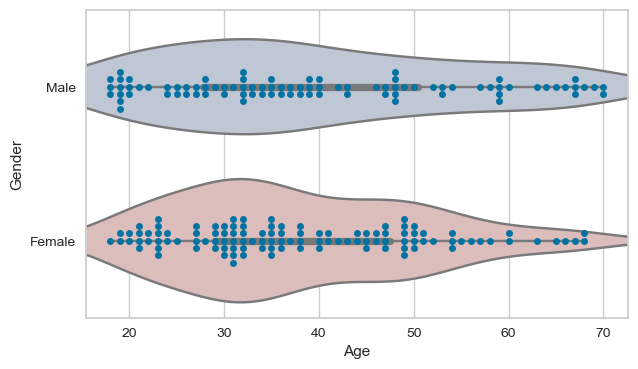

In [22]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Age' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Age' , y = 'Gender' , data = df)
plt.ylabel('Gender')

Text(25.972222222222214, 0.5, 'Gender')

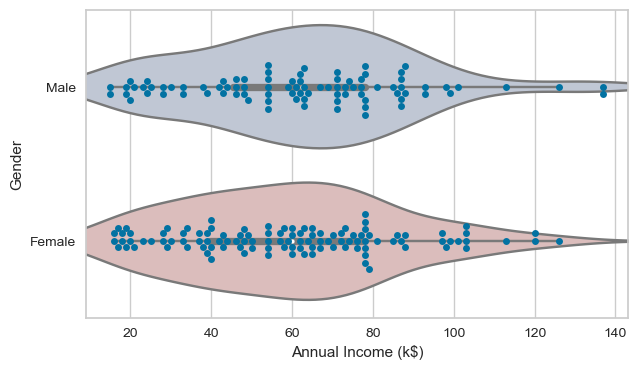

In [23]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Annual Income (k$)' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Annual Income (k$)' , y = 'Gender' , data = df)
plt.ylabel('Gender')

Text(25.972222222222214, 0.5, 'Gender')

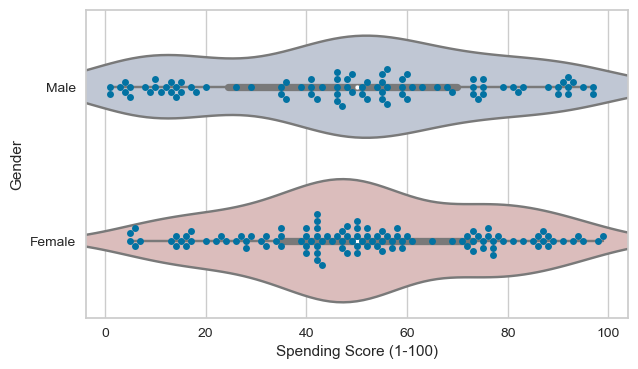

In [24]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Spending Score (1-100)' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Spending Score (1-100)' , y = 'Gender' , data = df)
plt.ylabel('Gender')

In [25]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

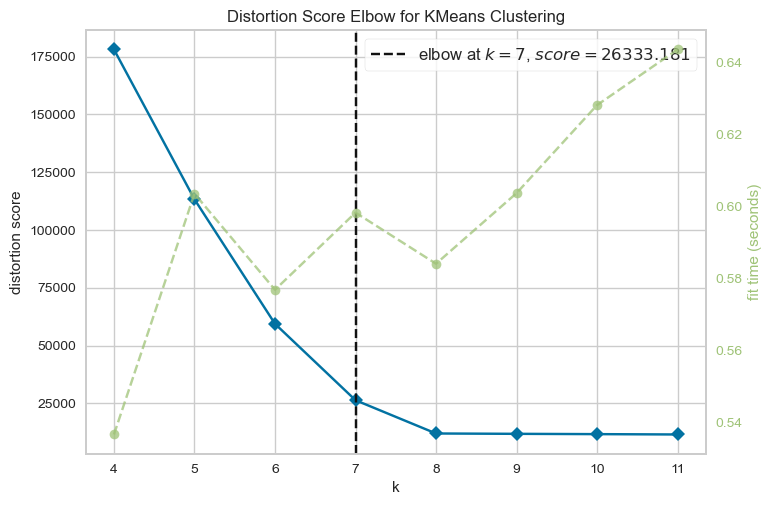

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

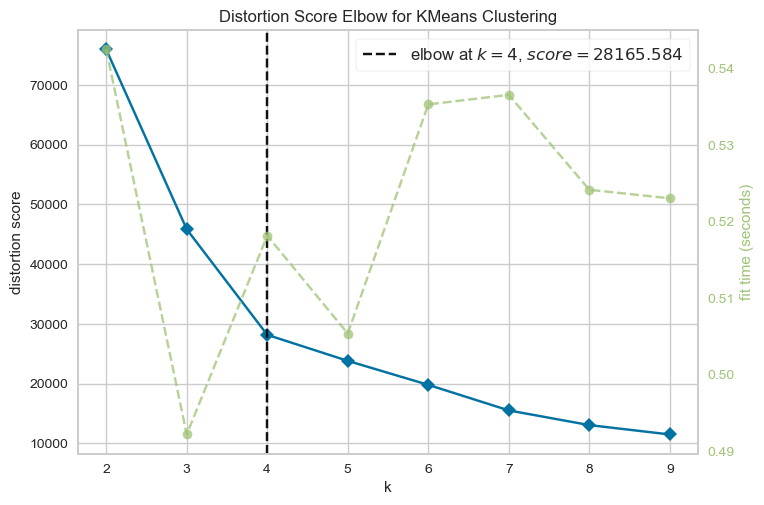

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data= df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

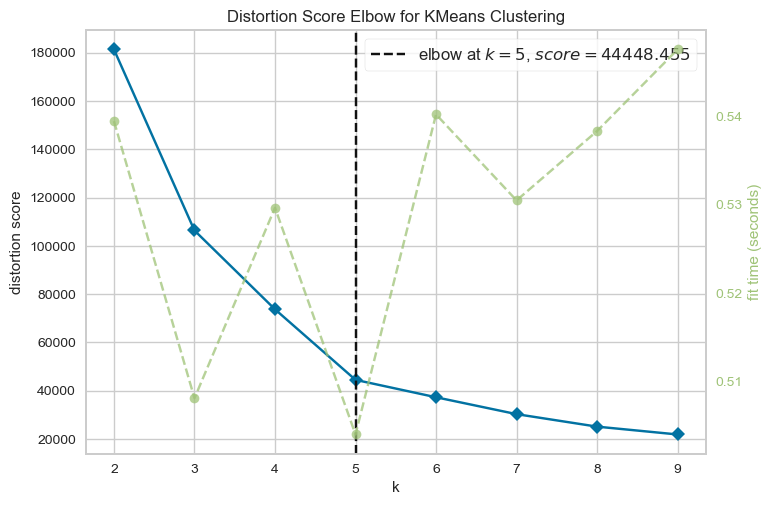

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
data=df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data)
visualizer.show() 

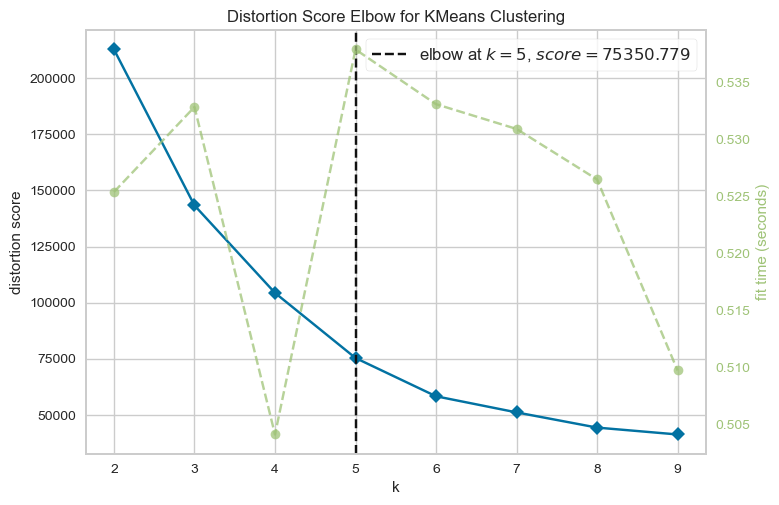

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data= df[['Age' , 'Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

In [30]:
data= df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 4) 
algorithm.fit(data)
labels1 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_

In [31]:
df['label1'] =  labels1 
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
5,6,Female,22,17,76,0
6,7,Female,35,18,6,1
7,8,Female,23,18,94,0
8,9,Male,64,19,3,1
9,10,Female,30,19,72,0


In [32]:
copy_df=df[df['label1']==0]
copy_df[['Age','Spending Score (1-100)']].describe()

,Age,Spending Score (1-100)
count,57.000000,57.000000
mean,30.175439,82.350877
std,5.535995,8.913255
min,18.000000,68.000000
25%,27.000000,75.000000
50%,30.000000,81.000000
75%,35.000000,90.000000
max,40.000000,99.000000


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

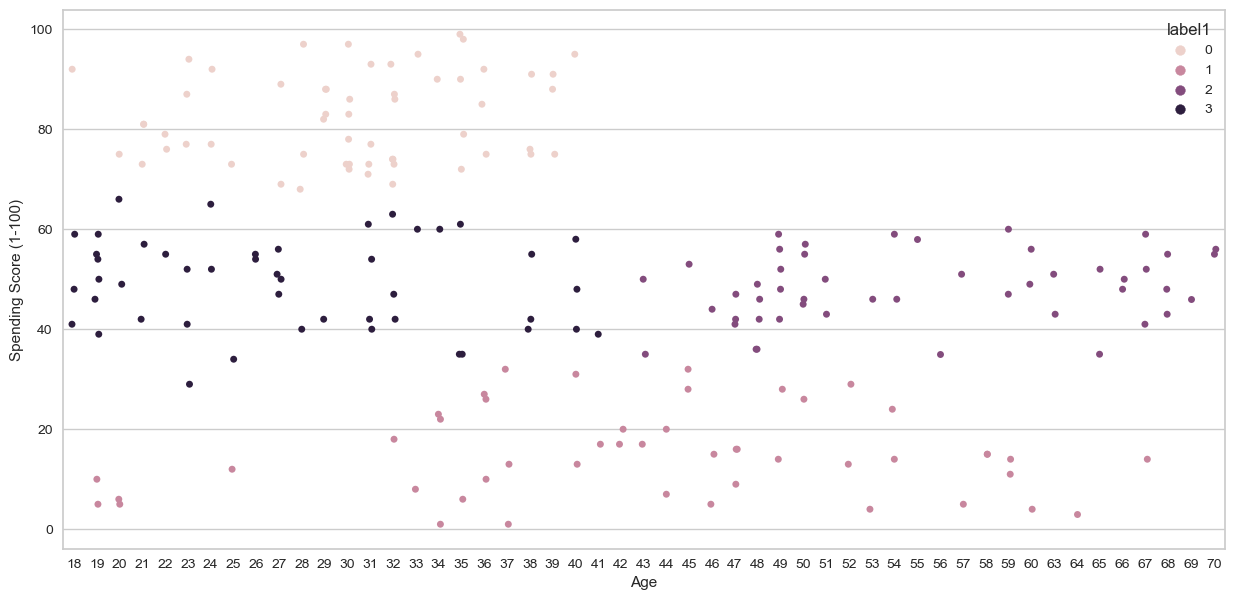

In [33]:
plt.figure(figsize = (15 , 7) )
sns.stripplot(x='Age', y='Spending Score (1-100)', data=df,hue='label1', jitter=True)

In [34]:
data= df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(data)
labels2 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_
df['label2'] =  labels2
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,3,3
5,6,Female,22,17,76,0,4
6,7,Female,35,18,6,1,3
7,8,Female,23,18,94,0,4
8,9,Male,64,19,3,1,3
9,10,Female,30,19,72,0,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

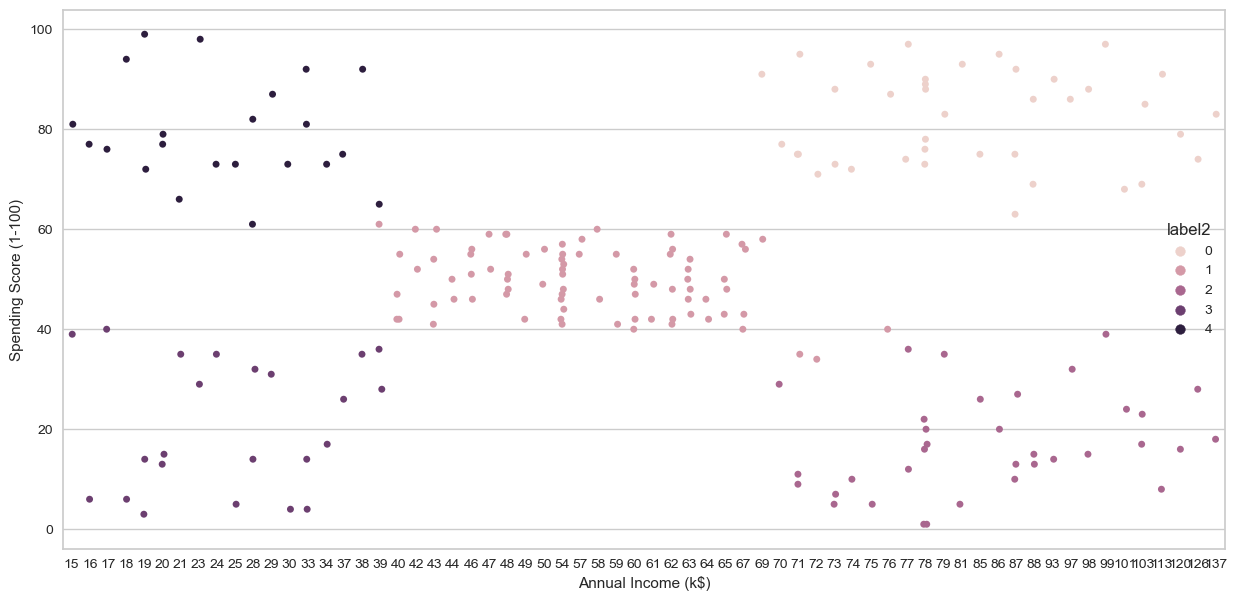

In [35]:
plt.figure(figsize = (15 , 7) )
sns.stripplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,hue='label2', jitter=True)

In [36]:
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(data)
labels3 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_
df['label3'] =  labels3
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,0,4,2
2,3,Female,20,16,6,1,3,4
3,4,Female,23,16,77,0,4,2
4,5,Female,31,17,40,3,3,4
5,6,Female,22,17,76,0,4,2
6,7,Female,35,18,6,1,3,4
7,8,Female,23,18,94,0,4,2
8,9,Male,64,19,3,1,3,4
9,10,Female,30,19,72,0,4,2


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

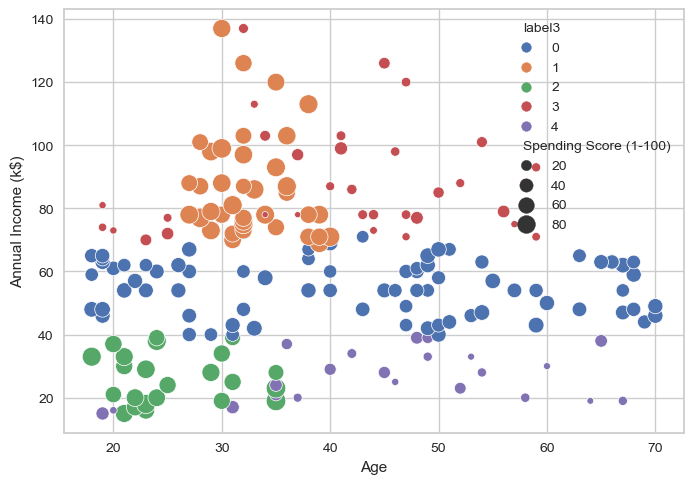

In [37]:
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='label3',size='Spending Score (1-100)',data=df,palette='deep',sizes=(20,200))

In [38]:
algorithm.predict([[19,15,39]])

array([4])

In [39]:
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

df['label3_pred']=algorithm.predict(data)

In [40]:
df[['label3','label3_pred']]

,label3,label3_pred
0,4,4
1,2,2
2,4,4
3,2,2
4,4,4
...,...,...
195,1,1
196,3,3
197,1,1
198,3,3


In [41]:
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
data.shape

(200, 3)

Text(0, 0.5, 'Euclidean distances')

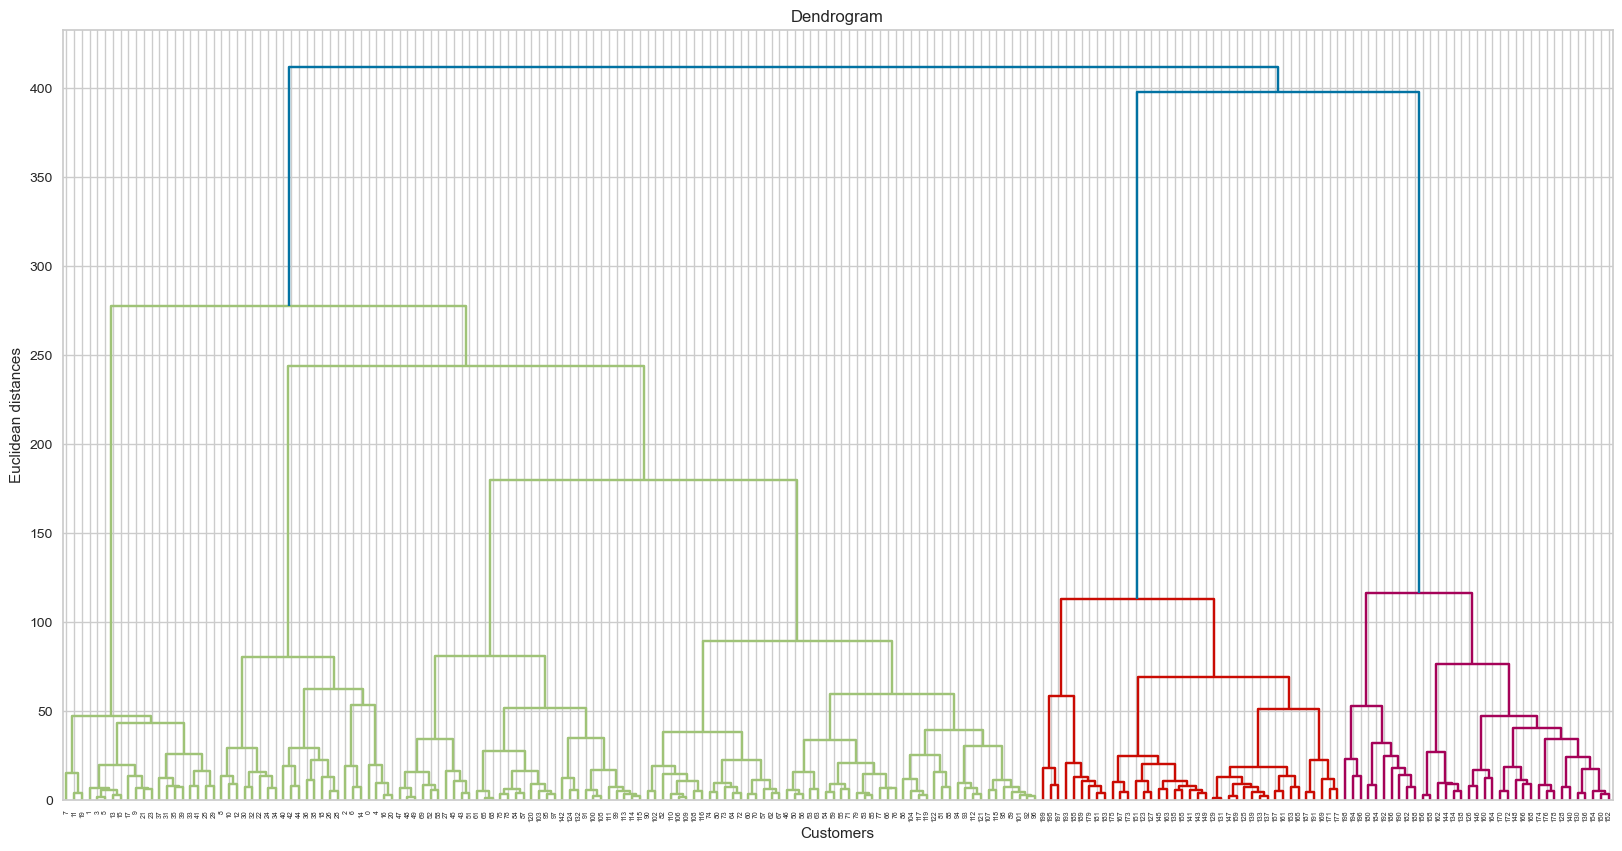

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster4=linkage(data, method='ward')
dendrogram = dendrogram(cluster4)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

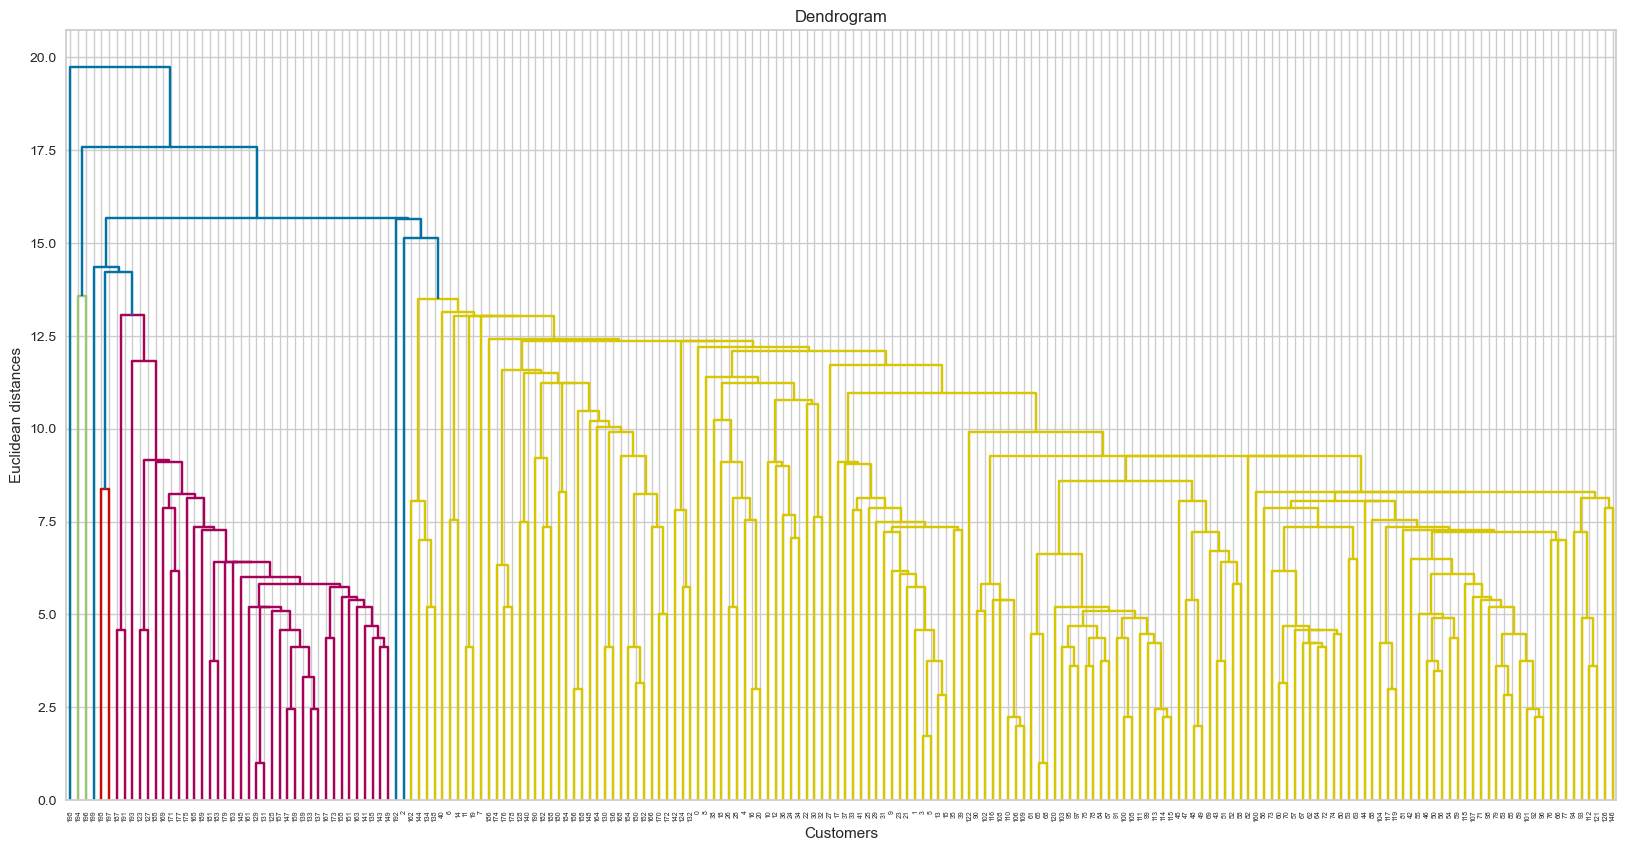

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster1=linkage(data,method='single')

dendrogram = dendrogram(cluster1)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

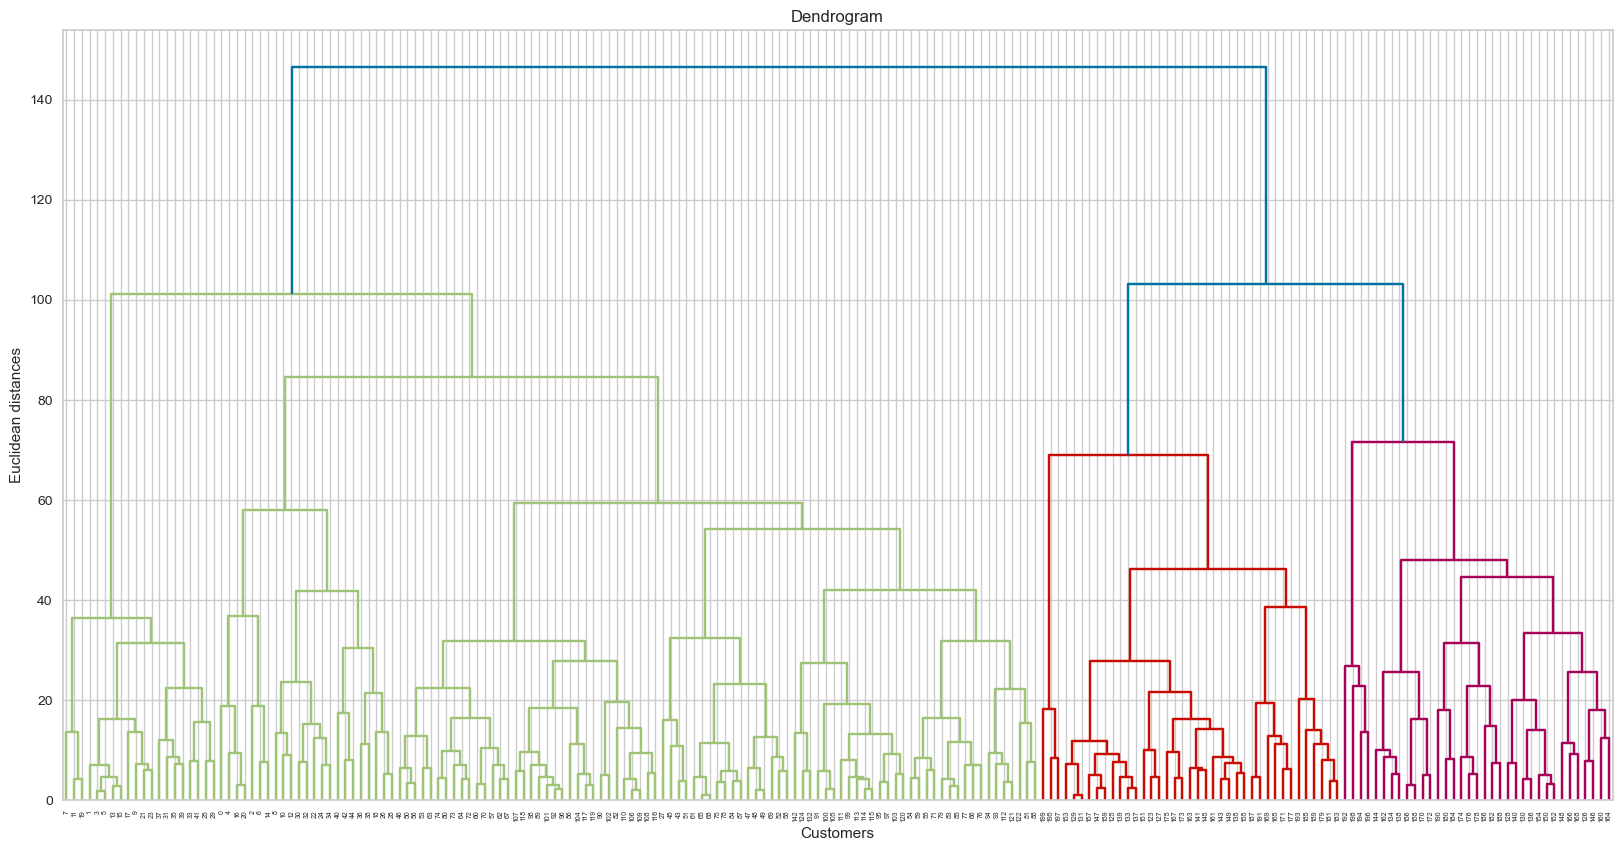

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster2=linkage(data,method='complete')

dendrogram = dendrogram(cluster2)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

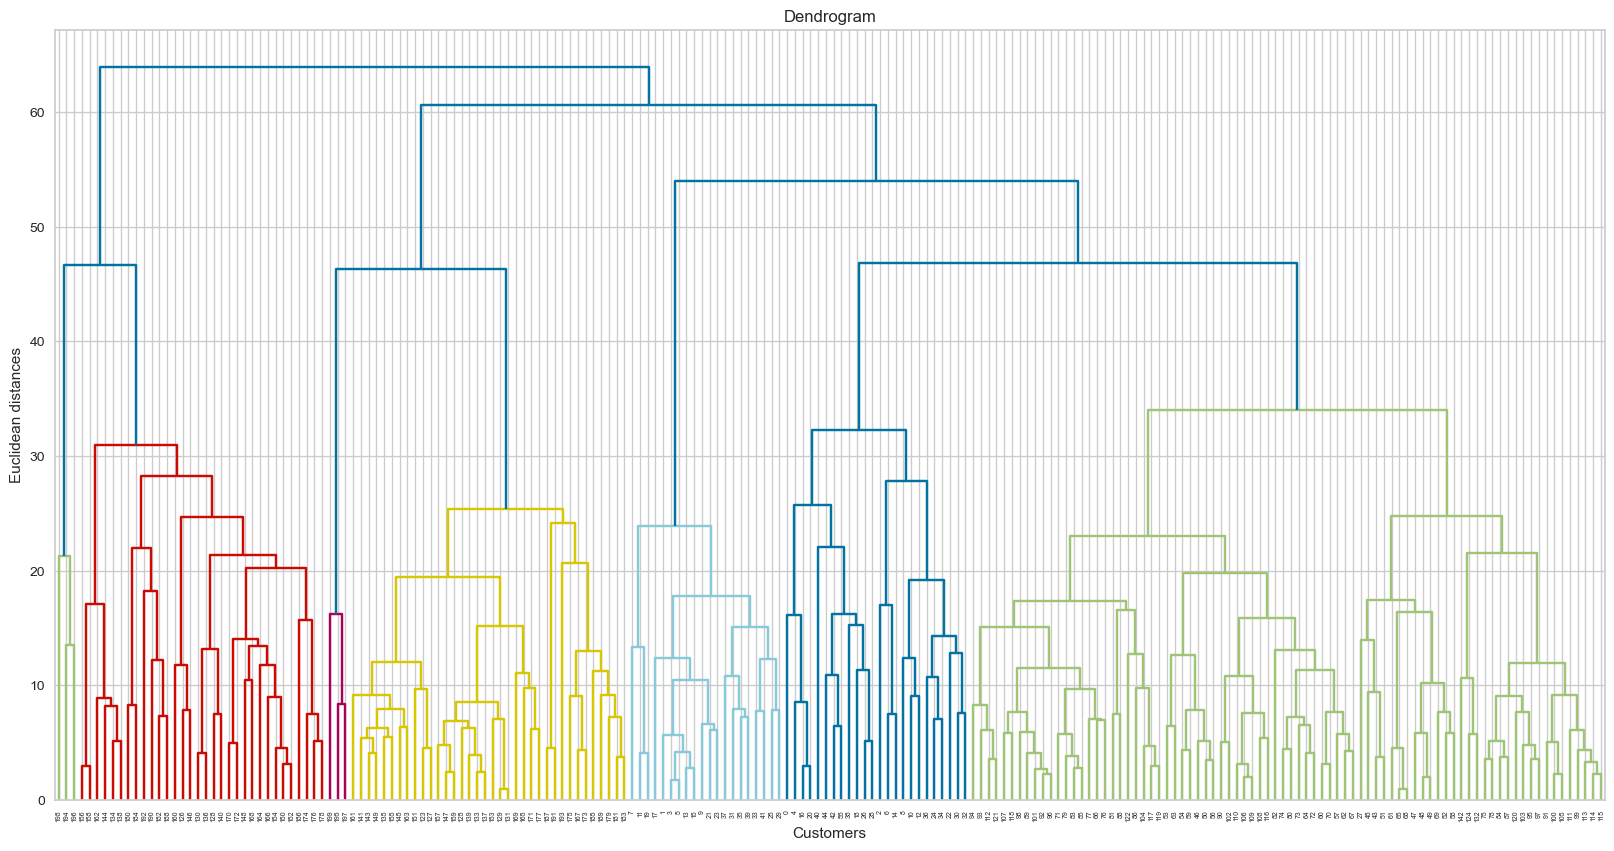

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster3=linkage(data,method='average')

dendrogram = dendrogram(cluster3)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_label=cluster_model.fit_predict(data)
df['label4']=cluster_label
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3,label3_pred,label4
0,1,Male,19,15,39,3,3,4,4,4
1,2,Male,21,15,81,0,4,2,2,3
2,3,Female,20,16,6,1,3,4,4,4
3,4,Female,23,16,77,0,4,2,2,3
4,5,Female,31,17,40,3,3,4,4,4


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

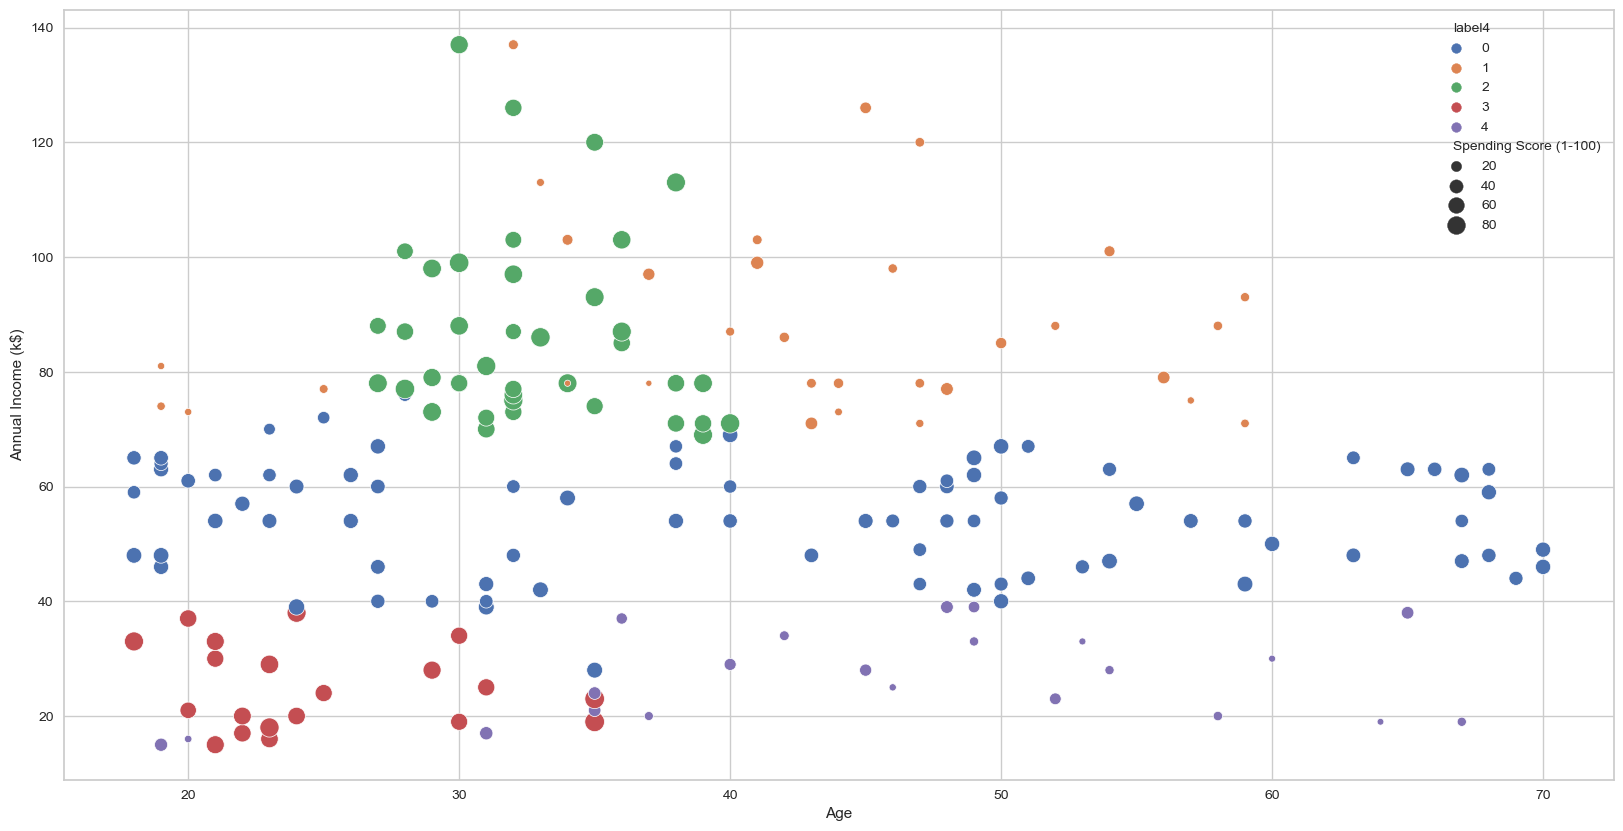

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='label4',size='Spending Score (1-100)',data=df,palette='deep',sizes=(20,200))

In [48]:
from sklearn.cluster import KMeans
import numpy as np


data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])

km=KMeans(n_clusters=3)
km.fit(data)
print(km.labels_)
print(km.predict([[7,7]]))

[1 1 1 2 2 0 0]
[2]


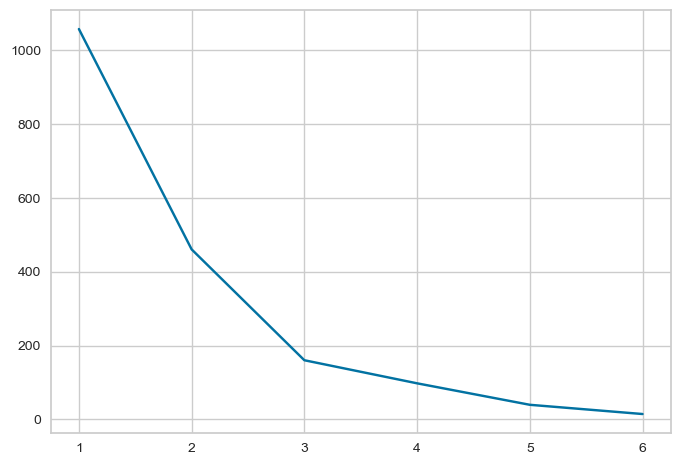

In [49]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])
temp=[]
for i in range(1,7):
  km=KMeans(n_clusters=i)
  km.fit(data)
  temp.append(km.inertia_)
plt.plot(range(1,7), temp)


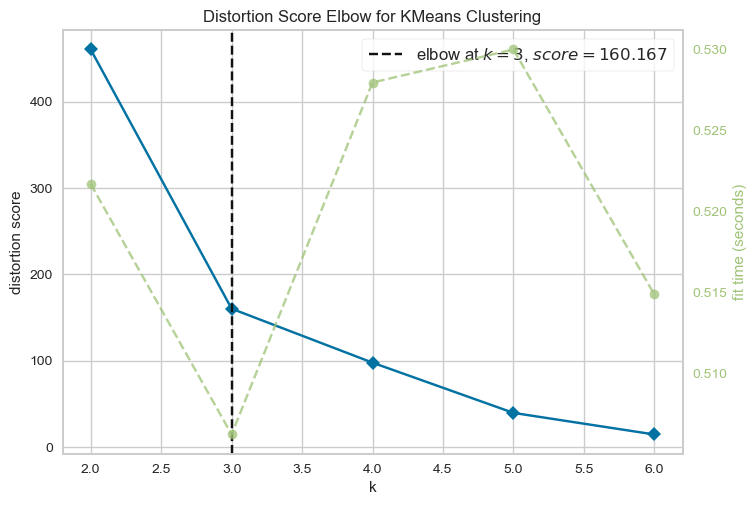

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])

visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(data) 
visualizer.show() 

Text(0, 0.5, 'weight')

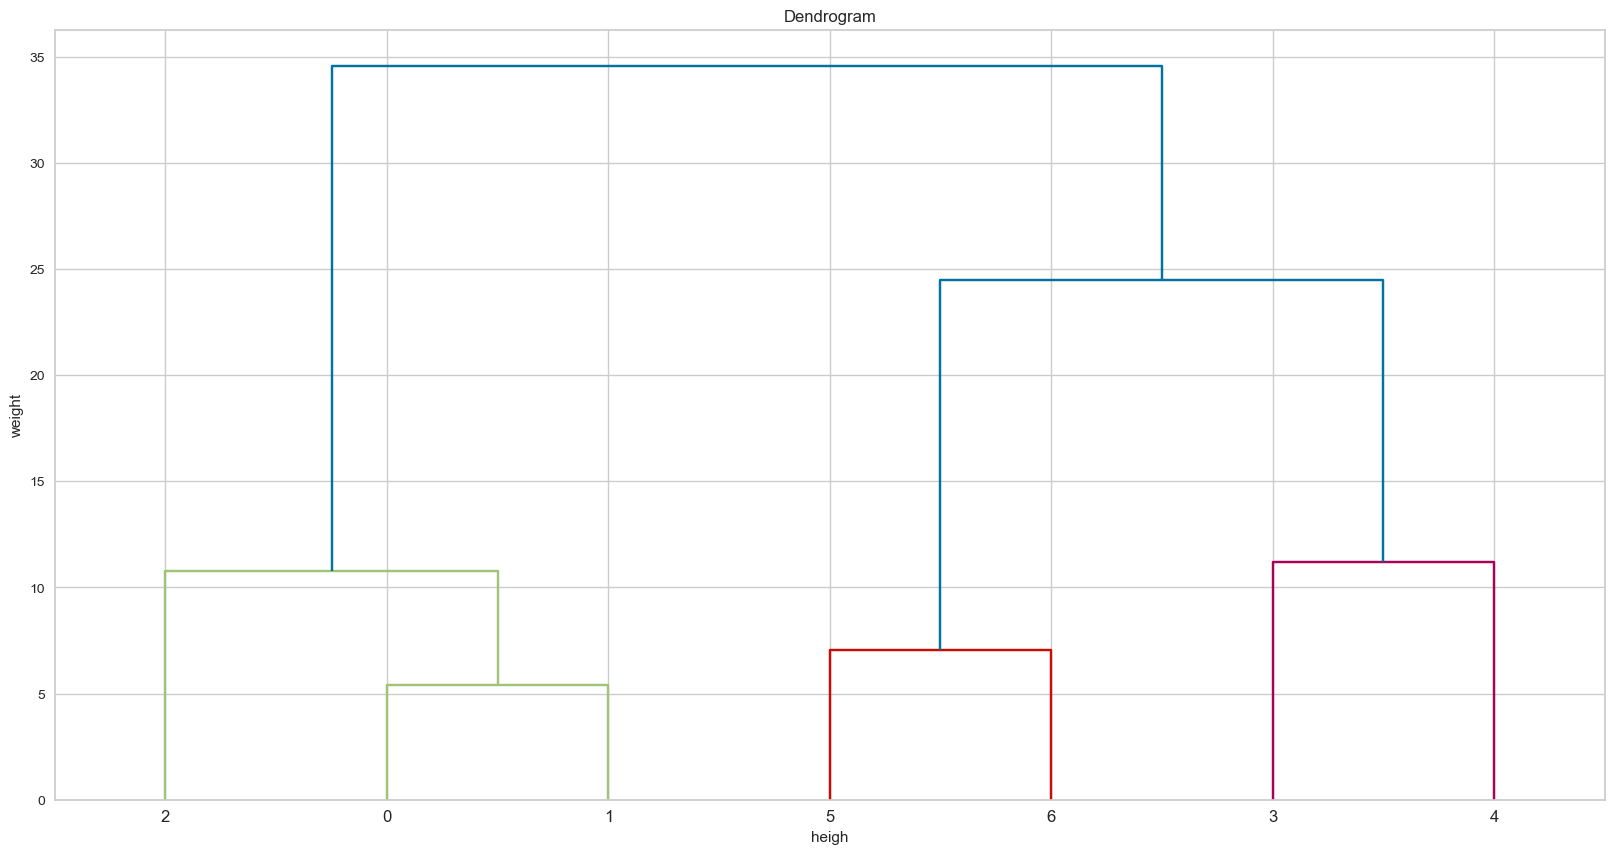

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])
plt.figure(figsize=(20,10))
cluster=linkage(data,method='ward')

dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('heigh')
plt.ylabel('weight')